In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA #try this for now

FILE INPUT

Original shape  (538, 35280)
Transformed shape  (538, 64)
Components
[[-7.97653211e-07 -4.44836652e-05 -3.41651254e-04 ...  4.27058885e-03
   4.26033176e-03  4.22741286e-03]
 [-1.73834825e-07 -1.22850086e-05 -2.19443004e-05 ... -2.67789039e-03
  -2.71845430e-03 -2.84846887e-03]
 [ 2.86574560e-07 -8.94796405e-06  2.60788906e-04 ... -1.68838442e-03
  -1.42039184e-03 -1.20764984e-03]
 ...
 [-2.19002226e-06 -2.58982811e-04 -6.93520387e-04 ...  5.26245734e-03
   5.01180584e-03  1.91442454e-03]
 [ 4.48799437e-06 -9.18242802e-04 -5.83478850e-03 ...  3.04218026e-03
  -3.03732205e-03 -2.22052755e-05]
 [ 4.20293060e-06  4.13998945e-04  3.08544288e-03 ...  6.03911693e-03
   3.32322175e-03  3.52853692e-03]]
Explained variance
[1.34731200e+10 9.40919383e+09 6.09270590e+09 4.81857094e+09
 3.96802277e+09 3.43637829e+09 2.55459149e+09 2.12177487e+09
 1.97716108e+09 1.73094539e+09 1.46921650e+09 1.41842040e+09
 1.37571888e+09 1.29838356e+09 1.13137651e+09 1.05606922e+09
 9.89868882e+08 9.56457791e+08 8

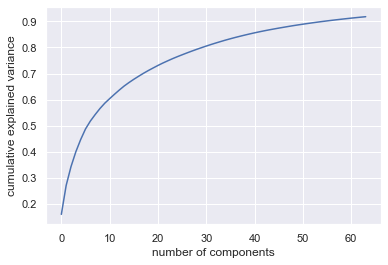

In [2]:
numComponents = 64 #According to the EV Ratio plot, this will get a CEV of ~91%.

#open directory with the raw WAV data CSV in it.
os.chdir('..')
os.chdir('./data/')

WavData = pd.read_csv('SampleWav.csv', index_col = 0)
#print(WavData.head())
pca = PCA(n_components = numComponents)
pca.fit(WavData.T)
reduced = pca.fit_transform(WavData)
print('Original shape ', np.shape(WavData))
print('Transformed shape ', np.shape(reduced))
print('Components')
print(pca.components_) #just to see what it came up with.
print('Explained variance')
print(pca.explained_variance_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

<class 'numpy.ndarray'>
[[  65656.86527413  -40802.33699473   10656.58646878 ...   -7708.26330513
    -3567.29458013    4101.57912525]
 [ -75940.44345442   25638.36621795    5508.6010565  ...    2895.49911349
     6100.08289361   -3037.00031448]
 [ -27388.47118067  -18204.6226525    -1536.92959671 ...     145.40701878
     -130.05431845   -1046.72373826]
 ...
 [ -58355.68647216  -25263.22749434  -26152.44904401 ...    4167.71955946
    -1765.31176396    -406.11733469]
 [ -30430.76304944  -18860.5407358    -1300.05842796 ...   -1616.86667749
      130.07948909   -2054.53146128]
 [-121975.02439322  -57158.00306214  -31712.65631262 ...   16957.42842912
    -8128.70010236   -2018.14780591]]


Text(0, 0.5, 'component 2')

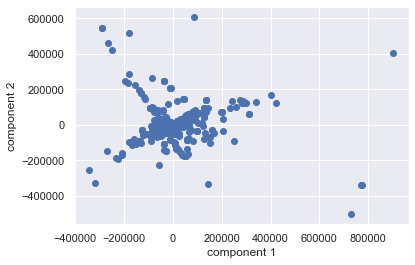

In [3]:
print(type(reduced))
print(reduced)
plt.scatter(reduced[:, 0], reduced[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')

OUTPUT TO CSV FILE

In [4]:
# next, make a NP array of every wav file in the directory
SampleList = np.array(os.listdir())
SampleList = SampleList[ np.char.endswith(SampleList, '.wav') ] #ignore everything that's not a .wav file.

outputData = pd.DataFrame(reduced, index = SampleList)
outputData.to_csv('PcaReducedWav.csv')